In [1]:
import random
import numpy as np

random.seed(1234)
np.random.seed(1234)

In [2]:
import scipy.stats

from numpy.random import randn

import matplotlib.pyplot as plt
%matplotlib inline

## 0.ZからYへ因果が存在する場合(通常の因果と相関)

In [3]:
# ノイズの生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Z = e_z
Y = 2*Z + e_y

In [4]:
# 相関係数を求める
np.corrcoef(Z, Y)

array([[1.        , 0.89379611],
       [0.89379611, 1.        ]])

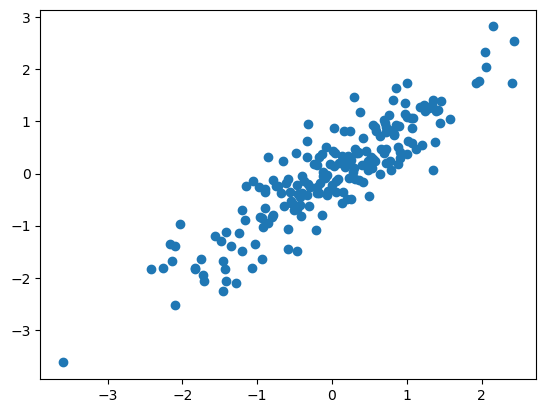

In [5]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std, Y_std)

## 1. 疑似相関：因果が逆

In [6]:
# ノイズの生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Y = e_y
Z = 2*Y + e_z

# 相関係数を求める
np.corrcoef(Z, Y)

array([[1.        , 0.90390263],
       [0.90390263, 1.        ]])

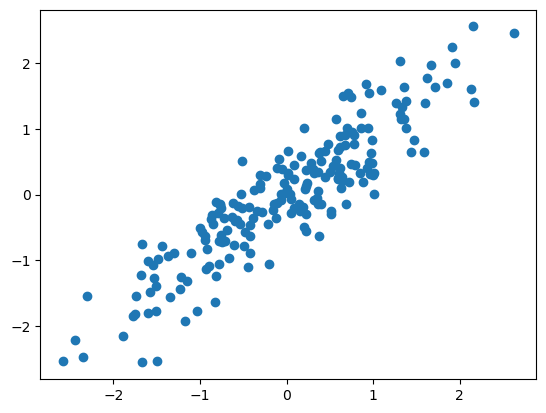

In [7]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std, Y_std)

## 2. 疑似相関：共通の原因(交絡)


In [ ]:
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)
e_z = randn(num_data)

# データの生成
Z = 3.3*e_x + e_z
Y = 3.3*e_z + e_y

# 相関係数を求める
np.corrcoef(Z, Y)

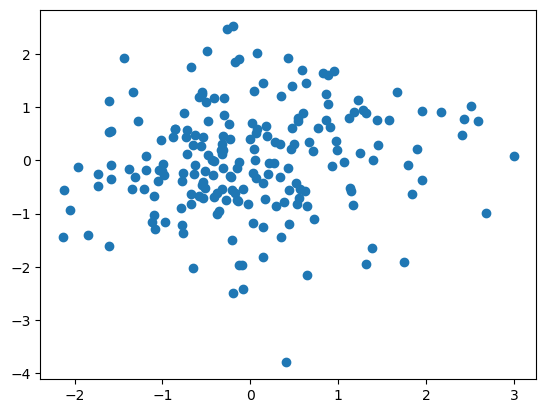

In [10]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std, Y_std)

## 3. 疑似相関：合流点での選抜

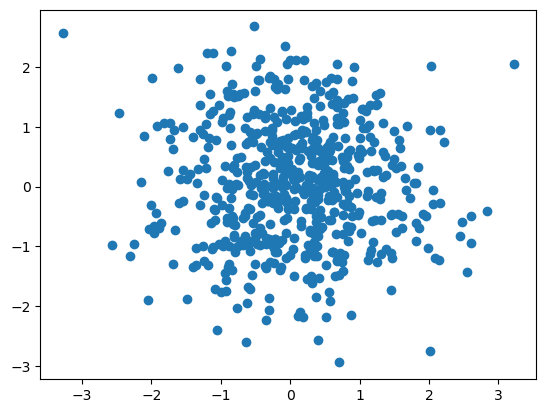

In [11]:
# ノイズの生成
num_data = 600
e_x = randn(num_data)
e_y = randn(num_data)

# データの生成 1
x = e_x
y = e_y

# 散布図を描画
plt.scatter(x,y)

In [12]:
# 相関係数を求める
np.corrcoef(x,y)

array([[ 1.        , -0.02052546],
       [-0.02052546,  1.        ]])

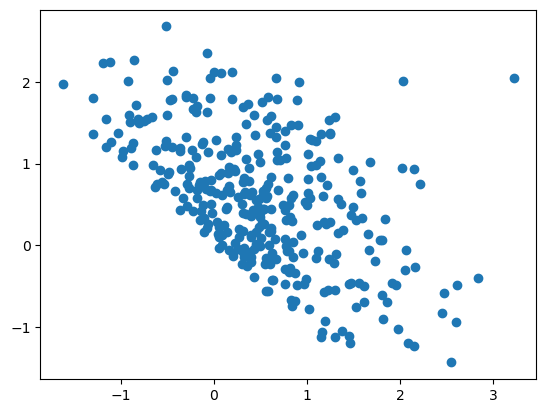

In [13]:
# 合流店を作成
z = x + y

# 新たな合流点での条件を満たす変数の用意
x_new = np.array([])
y_new = np.array([])

# 2の値が0以上で選抜してnew変数に追加(append)します
for i in range(num_data):
    if z[i] > 0.0:
        x_new = np.append(x_new, x[i])
        y_new = np.append(y_new, y[i])

# 散布図を描画
plt.scatter(x_new, y_new)

In [14]:
# 相関係数を求める
np.corrcoef(x,y)

array([[ 1.        , -0.02052546],
       [-0.02052546,  1.        ]])